# **Stock Price Prediction And Forecasting Using Stacked LSTM**

# **Import Dependencis**

In [31]:
#importing and calculating dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [24]:
#Scaling and matrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [25]:
#Tensorflow and LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# **Loading DataSet**

In [26]:
data = pd.read_csv('/content/StockPrice.csv')

In [27]:
data.head()

,Date,Open,High,Low,last,Close,Total Trade Quantity,Turnover (Lacs)
0,19-09-18,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
1,18-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
2,17-09-18,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
3,14-09-18,223.45,236.70,223.30,234.00,233.95,6377909,14784.50
4,12-09-18,216.35,223.70,212.65,221.65,222.65,4570939,10002.01


In [28]:
data.tail()

,Date,Open,High,Low,last,Close,Total Trade Quantity,Turnover (Lacs)
2024,27-07-10,117.6,119.50,112.00,118.80,118.65,586100,694.98
2025,26-07-10,120.1,121.00,117.10,117.10,117.60,658440,780.01
2026,23-07-10,121.8,121.95,120.25,120.35,120.65,281312,340.31
2027,22-07-10,120.3,122.00,120.25,120.75,120.90,293312,355.17
2028,21-07-10,122.1,123.00,121.05,121.10,121.55,658666,803.56


# **Data Engineering**

In [29]:
new_data = data.reset_index()['Close']

In [30]:
new_data

0       234.90
1       235.05
2       236.60
3       233.95
4       222.65
         ...  
2024    118.65
2025    117.60
2026    120.65
2027    120.90
2028    121.55
Name: Close, Length: 2029, dtype: float64

# **Data Preproseccing**

In [33]:
scaler=MinMaxScaler(feature_range=(0,1))
new_data=scaler.fit_transform(np.array(new_data).reshape(-1,1))

In [34]:
new_data

array([[0.62888072],
       [0.62949346],
       [0.63582516],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# **Training And Testing Data**

In [36]:
train_size=int(len(new_data)*0.65)
test_size=len(new_data)-train_size
train_data,test_data=new_data[0:train_size,:],new_data[train_size:len(new_data),:1]

In [37]:
train_size,test_size

(1318, 711)

In [38]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [39]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [40]:
print(X_train.shape), print(y_train.shape)

(1217, 100)
(1217,)


(None, None)

In [41]:
print(X_test.shape), print(ytest.shape)

(610, 100)
(610,)


(None, None)

In [42]:
# reshape for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# **LSTM model implementation**

In [43]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 13s 317ms/step - loss: 0.0265 - val_loss: 0.0049
Epoch 2/100
20/20 [==============================] - 4s 203ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 3/100
20/20 [==============================] - 6s 301ms/step - loss: 0.0018 - val_loss: 7.7248e-04
Epoch 4/100
20/20 [==============================] - 5s 247ms/step - loss: 0.0015 - val_loss: 8.7830e-04
Epoch 5/100
20/20 [==============================] - 4s 216ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 5s 264ms/step - loss: 0.0013 - val_loss: 8.7755e-04
Epoch 7/100
20/20 [==============================] - 4s 207ms/step - loss: 0.0012 - val_loss: 8.3081e-04
Epoch 8/100
20/20 [==============================] - 5s 242ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/100
20/20 [==============================] - 5s 221ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 10/100
20/20 [==============================] - 4s 202ms/step - loss

In [47]:
#prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 66ms/step


In [49]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [50]:
math.sqrt(mean_squared_error(y_train,train_predict))

40944.273862974886

In [51]:
math.sqrt(mean_squared_error(ytest,test_predict))

28817.27810615806

# **Plotting**

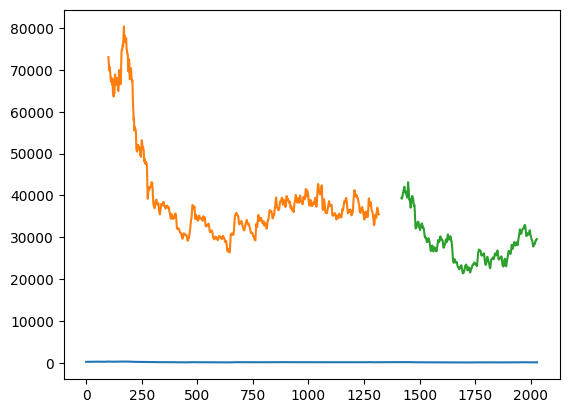

In [52]:
 # shift train predictions
look_back=100
trainPredictPlot = np.empty_like(new_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions
testPredictPlot = np.empty_like(new_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(new_data)-1, :] = test_predict
# plot baseline
plt.plot(scaler.inverse_transform(new_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [53]:
len(test_data)

711

In [54]:
x_input=test_data[611:].reshape(1,-1)
x_input.shape

(1, 100)

In [55]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [56]:
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

# **Prediction for next 30 days**

In [58]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.18913399 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242
 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261
 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307
 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131
 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065
 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222
 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405
 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758 0.12479575
 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497
 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059
 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327
 0.14971405 0.1621732  0.16319444 0.16584967 0.16911876 0.17259048
 0.17582028 0.17886674 0.18176159 0.18452166 0.1871618  0.1896985
 0.19214942 0.19453138 0.1968589  0.19914337 0.20139295 0.20361289
 0.20580602 0.20797326 0.21011469 0.21222942 0.2143